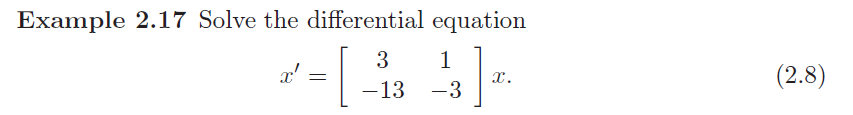

In [1]:
A = matrix( [[3,1],[-13,-3]])
A 

[  3   1]
[-13  -3]

In [2]:
eigenvectors = A.eigenvectors_right()
eigenvectors

[(-2*I, [(1, -3 - 2*I)], 1), (2*I, [(1, -3 + 2*I)], 1)]

In [3]:
lambda1, [v1], m1 = eigenvectors[0]
lambda1, v1, m1

(-2*I, (1, -3 - 2*I), 1)

In [4]:
lambda2, [v2], m2 = eigenvectors[1]
lambda2, v2, m2

(2*I, (1, -3 + 2*I), 1)

In [5]:
t = var('t')
assume(t, 'real')

In [6]:
x1 = exp(lambda1*t) * v1
x1 

(e^(-2*I*t), -(3 + 2*I)*e^(-2*I*t))

In [7]:
diff(x1,t) == A*x1

True

In [8]:
diff(x1,t) - A*x1

(0, 0)

In [9]:
CC = ComplexField()

In [10]:
u1 = exp(CC(lambda1)*t) 
u1

e^(-2.00000000000000*I*t)

In [11]:
u1 = exp(CC(lambda1)*t).maxima_methods().demoivre()
u1 

cos(2.0*t) - I*sin(2.0*t)

In [12]:
x1 = u1 * v1
x1 

(cos(2.0*t) - I*sin(2.0*t), -(3 + 2*I)*cos(2.0*t) - (2 - 3*I)*sin(2.0*t))

In [13]:
def separate_real_imag(complex_vector):
    """
    Separate the real and imaginary parts of a vector of complex numbers.

    Args:
    complex_vector: A vector of complex numbers.

    Returns:
    A tuple containing the real vector and the imaginary vector.
    """
    # Extract the real and imaginary parts for each component
    real_parts = [z.real_part() for z in complex_vector]
    imag_parts = [z.imag_part() for z in complex_vector]

    # Form the real and imaginary vectors
    real_vector = vector(real_parts)
    imaginary_vector = vector(imag_parts)

    return real_vector, imaginary_vector

In [14]:
x11, x12 = separate_real_imag(x1)
x11, x12

((cos(2.0*t), -3*cos(2.0*t) - 2*sin(2.0*t)),
 (-sin(2.0*t), -2*cos(2.0*t) + 3*sin(2.0*t)))

In [15]:
c1, c2 = var('c1 c2')
assume(c1, 'real')
assume(c2, 'real')

x = c1*x11 + c2*x12
x 

(c1*cos(2.0*t) - c2*sin(2.0*t), -c1*(3*cos(2.0*t) + 2*sin(2.0*t)) - c2*(2*cos(2.0*t) - 3*sin(2.0*t)))

In [16]:
x.diff(t) == A*x

True